In [21]:
import re
import regex
import pandas as pd
import re
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
cd '/content/drive/My Drive/Colab Notebooks/[2022.1] PLN'

/content/drive/My Drive/Colab Notebooks/[2022.1] PLN


In [6]:
!pwd
!ls

/content/drive/My Drive/Colab Notebooks/[2022.1] PLN
classificador.ipynb  imdb-reviews-pt-br.csv


In [7]:
def search_pattern_in_string(pattern, string):
    '''
    Returns the string from the first match of 
    `pattern` in `string`.
    Returns "No match" if not found.
    '''
    result = re.compile(pattern).search(string)
    if not result:
        return "No match"
    else:
        return "Found pattern: " + result.group()

1. Implemente uma função usando expressões regulares que testa se um string representa um CPF no formato correto. Mostre exemplos.




In [8]:
print(search_pattern_in_string("(\d{3})\.?(\d{3})\.?(\d{3})\-?(\d{2})", "000.000.000-00"))
print(search_pattern_in_string("(\d{3})\.?(\d{3})\.?(\d{3})\-?(\d{2})", "00000000000"))
print(search_pattern_in_string("(\d{3})\.?(\d{3})\.?(\d{3})\-?(\d{2})", "000.000.000"))

Found pattern: 000.000.000-00
Found pattern: 00000000000
No match


2. Implemente uma função usando expressões regulares que seja capaz, com uma  ́unica expressão regular, de extrair rua, número, apartamento (opcionalmente), bairro (opcionalmente), CEP, cidade e estado. Esta função deve ser capaz de funcionar em todos os exemplos abaixo:

• Rua José da Silva, 346, Farol, CEP 57002-220. Maceió, AL.

• Rua da Consolação, 9999, apt 302, Consolação, CEP 11022-202. São Paulo, SP.

• Avenida Atlântica, 420, ap 1001, Copacabana, cep 22011-010. Rio de Janeiro, RJ.

In [9]:
pattern = '([A-Za-záàãâéêíóõúç\s]+), ?(\d*), (apt? (\d+), )?(([A-Za-záàãâéêíóõúç]+),)? ((cep|CEP) (\d{5}\-\d{3})). ([A-Za-záàãâéêíóõúç\s]+), ([A-Z]{2})'

def verifyResult(pattern, string):
  result = re.compile(pattern).search(string)
  if not result:
    print('No match\n\n')
  else:
    p = re.compile(pattern)
    test = p.search(string)
    print('Nome da rua: ', test.group(1), '\nNúmero: ', test.group(2), '\nComplemento: ' + test.group(3) if test.group(3) else '', '\nBairro: ', test.group(5), 
          '\nCEP: ', test.group(9), '\nCidade: ', test.group(10), '\nUF: ', test.group(11), '\n\n')

verifyResult(pattern, 'Rua José da Silva, 346, Farol, CEP 57002-220. Maceió, AL.')
verifyResult(pattern, 'Rua da Consolação, 9999, apt 302, Consolação, CEP 11022-202. São Paulo, SP.')
verifyResult(pattern, 'Avenida Atlântica, 420, ap 1001, Copacabana, cep 22011-010. Rio de Janeiro, RJ.')

Nome da rua:  Rua José da Silva 
Número:  346  
Bairro:  Farol, 
CEP:  57002-220 
Cidade:  Maceió 
UF:  AL 


Nome da rua:  Rua da Consolação 
Número:  9999 
Complemento: apt 302,  
Bairro:  Consolação, 
CEP:  11022-202 
Cidade:  São Paulo 
UF:  SP 


Nome da rua:  Avenida Atlântica 
Número:  420 
Complemento: ap 1001,  
Bairro:  Copacabana, 
CEP:  22011-010 
Cidade:  Rio de Janeiro 
UF:  RJ 




3. Implemente uma função usando expressões regulares que encontre todas as URLs em um string. Mostre exemplos.

In [10]:
pattern = '((https?)://)?(www\.)?[a-zA-Z0-9@:%._\+~#=]+\.[a-zA-Z0-9]{1,6}([a-zA-Z0-9()@:%_\+.~#?&//=]*)'
print(search_pattern_in_string(pattern, 'domínio www.google.com usado na internet'))
print(search_pattern_in_string(pattern, 'domínio https://www.google.com usado na internet'))
print(search_pattern_in_string(pattern, 'domínio http://www.google.com usado na internet'))
print(search_pattern_in_string(pattern, 'domínio google.com usado na internet'))

# print(re.findall(pattern, 'domínios www.google.com e www.colab.research.google.com usados na internet'))


Found pattern: www.google.com
Found pattern: https://www.google.com
Found pattern: http://www.google.com
Found pattern: google.com


4. Considere o seguinte exemplo de referência de livro em formato de citação APA:

Manning, C. D., Manning, C. D., & Schutze, H. (1999). Foundations of statistical natural language processing. MIT press.

Implemente uma função usando expressões regulares que extraia cada autor, ano de publicação, título e editora do livro, para qualquer referência de livro neste formato.

In [11]:
citation = "Manning, C. D., & Schutze, H. (1999). Foundations of statistical natural language processing. MIT press."

def patternCitation(citation):
  lastName = "[A-Z]\."
  firstName = "[A-Z][a-z]+"
  author = f"(?P<Autor>{firstName},?(?:\s{lastName})+)"
  authorList = f"({author})(((?:, ({author}))*(?:, & ({author})))|())"
  year = "(?P<Ano>\d+)"
  title = "(?P<Título>[\w,\-\s:,()]+)"
  publishingCompany = "(?P<Editora>[\w\s:,]+)"

  pattern = regex.compile(f"{authorList} \({year}\)\. {title}\. {publishingCompany}\.")
  match = pattern.match(citation)
  return match.capturesdict() if match else {}

print(patternCitation(citation))

{'Autor': ['Manning, C. D.', 'Schutze, H.'], 'Ano': ['1999'], 'Título': ['Foundations of statistical natural language processing'], 'Editora': ['MIT press']}


5. Implemente uma função usando expressões regulares que encontre e substitua todas as datas em formato dd/mm/yyyy por mm-dd-yy. Mostre exemplos.

In [12]:
chars = "([0-9]{2})"
doubleChars = "([0-9]{4})"
pattern = f"{chars}\/{chars}\/{doubleChars}"
string = '25/09/2001'

delimiter = "-"
sub_string = re.sub(r'(\d{2})/(\d{2})/(\d{4})', r'\2-\1-\3', string)
split_string = re.split(delimiter, sub_string)
split_string[2] = split_string[2][-2:]
string_formatted = "-".join(split_string)

print(string_formatted)

09-25-01


6. Determine a distribuição de comprimentos dos textos (em quantidade de caracteres), listando estas quantidades e plotando um histograma.

In [13]:
review = pd.read_csv('imdb-reviews-pt-br.csv')
review.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [14]:
text_column = review['text_pt']
print(f"Size: ", review.shape, "\nColumns: ", list(review.columns))

Size:  (49459, 4) 
Columns:  ['id', 'text_en', 'text_pt', 'sentiment']


In [15]:
print(review.text_pt.apply(len))

0         978
1        1373
2        1185
3        1848
4        1531
         ... 
49454     604
49455     356
49456    2458
49457    1027
49458    1049
Name: text_pt, Length: 49459, dtype: int64


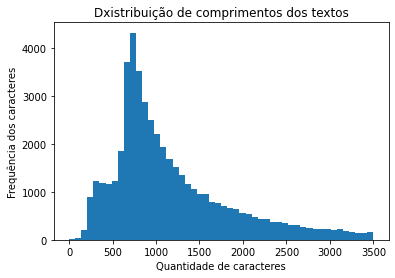

In [16]:
review['text_pt'].str.len().plot.hist(bins=50, range=(0,3500))
plt.title("Dxistribuição de comprimentos dos textos")
plt.xlabel("Quantidade de caracteres")
plt.ylabel("Frequência dos caracteres")
plt.show()

7. Aplique os seguintes passos de pré-processamento aos textos:


*   Remova todas as palavras que contêm números;
*   Converta as palavras para minúsculas;
* Remova pontuação;
* Tokenize os textos em palavras, gerando um dicionário  ́unico com n tokens e convertendo cada texto em um vetor de dimensão n com a respectiva contagem de palavras.

Em seguida, encontre as 10 palavras mais frequentes da base de textos.



In [17]:
def preprocessing(text_pt):
  text_pt = re.sub(r'\w*\d\w*', '', text_pt)
  text_pt = re.sub(r'[^a-zA-Z ]', '', text_pt.lower())
  return re.sub(r'\s+', ' ', text_pt) 

In [18]:
review.text_pt = review.text_pt.apply(preprocessing)
review.text_pt

0        mais uma vez o sr costner arrumou um filme por...
1        este um exemplo do motivo pelo qual a maioria ...
2        primeiro de tudo eu odeio esses raps imbecis q...
3        nem mesmo os beatles puderam escrever msicas q...
4        filmes de fotos de lato no uma palavra apropri...
                               ...                        
49454    como a mdia de votos era muito baixa e o fato ...
49455    o enredo teve algumas reviravoltas infelizes e...
49456    estou espantado com a forma como este filme e ...
49457    a christmas together realmente veio antes do m...
49458    o drama romntico da classe trabalhadora do dir...
Name: text_pt, Length: 49459, dtype: object

In [22]:
def tokenize(raw_text: str):
    tokenized_str = nltk.word_tokenize(raw_text)
    tokens = [i.lower() for i in tokenized_str if i not in string.punctuation]
    return tokens

# review['tokenized'] = review.text_pt.apply(tokenize)
review['tokenized'] = review.text_pt.apply(tokenize)

In [23]:
review

,id,text_en,text_pt,sentiment,tokenized
0,1,Once again Mr. Costner has dragged out a movie...,mais uma vez o sr costner arrumou um filme por...,neg,"[mais, uma, vez, o, sr, costner, arrumou, um, ..."
1,2,This is an example of why the majority of acti...,este um exemplo do motivo pelo qual a maioria ...,neg,"[este, um, exemplo, do, motivo, pelo, qual, a,..."
2,3,"First of all I hate those moronic rappers, who...",primeiro de tudo eu odeio esses raps imbecis q...,neg,"[primeiro, de, tudo, eu, odeio, esses, raps, i..."
3,4,Not even the Beatles could write songs everyon...,nem mesmo os beatles puderam escrever msicas q...,neg,"[nem, mesmo, os, beatles, puderam, escrever, m..."
4,5,Brass pictures movies is not a fitting word fo...,filmes de fotos de lato no uma palavra apropri...,neg,"[filmes, de, fotos, de, lato, no, uma, palavra..."
...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...",como a mdia de votos era muito baixa e o fato ...,pos,"[como, a, mdia, de, votos, era, muito, baixa, ..."
49455,49457,"The plot had some wretched, unbelievable twist...",o enredo teve algumas reviravoltas infelizes e...,pos,"[o, enredo, teve, algumas, reviravoltas, infel..."
49456,49458,I am amazed at how this movieand most others h...,estou espantado com a forma como este filme e ...,pos,"[estou, espantado, com, a, forma, como, este, ..."
49457,49459,A Christmas Together actually came before my t...,a christmas together realmente veio antes do m...,pos,"[a, christmas, together, realmente, veio, ante..."


In [24]:
def freq_words(x, terms = 50):
  all_words = ' '.join([text_pt for text_pt in x])
  all_words = all_words.split()

  fdist = nltk.FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  d = words_df.nlargest(columns="count", n = terms)
  plt.figure(figsize=(8,12))
  ax = sns.barplot(data=d, x="count", y = "word", color='skyblue')
  ax.set(ylabel='word')
  plt.show()

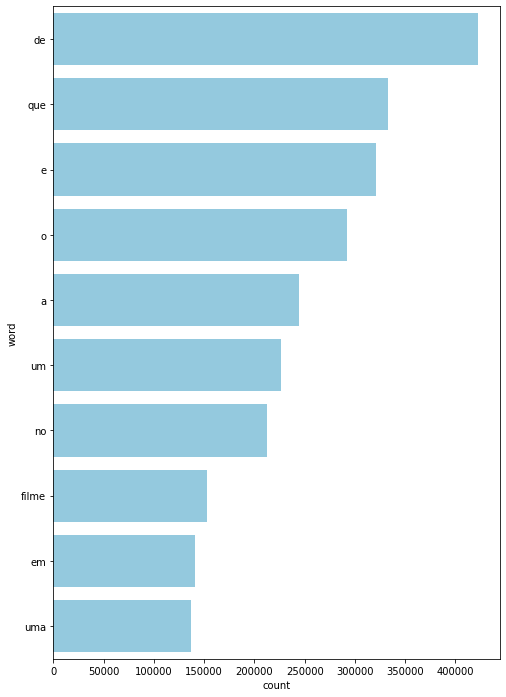

In [25]:
freq_words(review['text_pt'], 10)

8. Aplique os seguintes passos de pré-processamento aos textos processados na questão anterior:


*   Remova stopwords;
*   Realize rotulação de POS;
* Realize stemização;

a) Exiba os resultados em alguns textos.

b) Verifique quais são as 10 palavras mais frequentes e compare com as 10 palavras mais frequentes da questão anterior.

c) Repita a letra b) usando os tokens stemizados.

d) Verifique quais são as classes gramaticais mais frequentes. 



In [27]:
stop_words = set(nltk.corpus.stopwords.words('portuguese'))
def tokenize_text(raw_text: str):
    tokenized_str = nltk.word_tokenize(raw_text)
    tokens = [i.lower() for i in tokenized_str if (i not in string.punctuation) and (i not in stop_words)]
    return tokens

def pos_text(sentence):
  words = str(sentence).split(' ')
  return nltk.pos_tag(sentence)

snowball_stemmer = nltk.stem.snowball.SnowballStemmer('portuguese')
def stem_snowball(words):
  return ' '.join([snowball_stemmer.stem(word[0]) for word in words])

In [28]:
review['second_tokenized'] = review.text_pt.apply(tokenize_text)


In [29]:
review['second_tokenized'] = review.second_tokenized.apply(pos_text)

In [30]:
review['second_tokenized'] = review.second_tokenized.apply(stem_snowball)

In [31]:
review[['tokenized', 'second_tokenized']]

,tokenized,second_tokenized
0,"[mais, uma, vez, o, sr, costner, arrumou, um, ...",vez sr costn arrum film temp necessri alm terr...
1,"[este, um, exemplo, do, motivo, pelo, qual, a,...",exempl motiv maior film so mesm genric chat h ...
2,"[primeiro, de, tudo, eu, odeio, esses, raps, i...",primeir tud odei raps imbec pod agir arma pres...
3,"[nem, mesmo, os, beatles, puderam, escrever, m...",beatl pud escrev msic tod gost embor walt hill...
4,"[filmes, de, fotos, de, lato, no, uma, palavra...",film fot lat palavr apropri verdad so tant ous...
...,...,...
49454,"[como, a, mdia, de, votos, era, muito, baixa, ...",mdi vot baix fat funcionri locador achar tud b...
49455,"[o, enredo, teve, algumas, reviravoltas, infel...",enred algum reviravolt infeliz inacreditv enta...
49456,"[estou, espantado, com, a, forma, como, este, ...",espant form film maior outr mdi estrel menor h...
49457,"[a, christmas, together, realmente, veio, ante...",christm togeth realment vei antes temp cri joh...


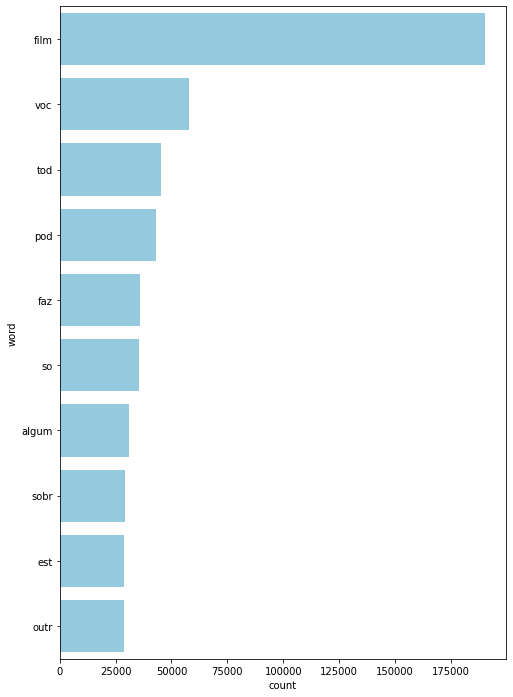

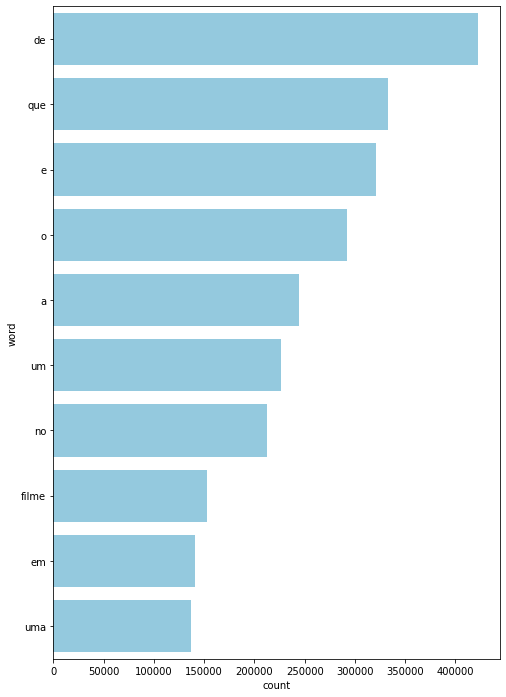

In [32]:
freq_words(review['second_tokenized'], 10)
freq_words(review['text_pt'], 10)